In [3]:
import pandas as pd
import numpy as np

### 1.

In [4]:
Name = ['John', 'Mike', 'Sally', 'Jane', 'Joe', 'Dan', 'Phil']
Salary = [300,200,550,500,600,600,550]
manager_id = [3,3,4,7,7,3,None]
id = [1,2,3,4,5,6,7]
Data = {'id': id, 'Name':Name, 'Salary': Salary, 'manager_id':manager_id}

df = pd.DataFrame(Data)

df['manager_id'] = pd.to_numeric(df['manager_id'], errors='coerce').fillna(0).astype('int')
#df.dtypes

#### a. Give the name of employees, whose salaries are greater than their immediate manager’s

In [5]:
df = df.set_index('id').copy()
df

,Name,Salary,manager_id
id,,,
1,John,300,3
2,Mike,200,3
3,Sally,550,4
4,Jane,500,7
5,Joe,600,7
6,Dan,600,3
7,Phil,550,0


In [6]:
l = []
for i in range(len(Name)):
    s = df.iloc[i,1]
    mn_id = df.iloc[i,2]
    mn_s = df.iloc[mn_id-1,1]
    if s > mn_s:
        l.append(df.iloc[i,0])
print("Employees with higher salaires than managers: '", l)

Employees with higher salaires than managers: ' ['Sally', 'Joe', 'Dan']


#### b. What is the average salary of employees who do not manage anyone? In the sample above, that would be John, Mike, Joe and Dan, since they do not have anyone reporting to them

In [7]:
df2 = df[[x not in manager_id for x in id]]
df2 # dataframe where employes are not a manager

,Name,Salary,manager_id
id,,,
1,John,300,3
2,Mike,200,3
5,Joe,600,7
6,Dan,600,3


In [8]:
avg = df2.Salary.mean()
print("The average salary of employees who do not manage anyone is " + str(avg))

The average salary of employees who do not manage anyone is 425.0


### 2. Write a function ‘exists’ which takes a variable symbol v and returns whether v is defined.

In [9]:
def exists(v):
 try:
  type (eval(v))
 except:
  return 0
 else:
  return 1
user_name=1
if exists('user_name'):
 print('User name is defined')
else:
 print('User name is not defined')

User name is defined


### 3. Create a function to compute N layer of a Pascal Triangle. The first 4 later will looks like:
    
    1\
    11\
    121\
    1331

In [10]:
def pascal_triangle():
    line = [1]
    while True:
        yield line
        line = [1] + [line[i] + line[i + 1] for i in range(len(line) - 1)] + [1]

n=0
for item in pascal_triangle():
    print(item)
    n += 1
    if n % 10 == 0:
        break

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


### 4. Assume have the following portfolio as of 2016/01/01:\

AAPL.O 15%\
IBM.N 20%\
GOOG.O 20%\
BP.N 15%\
XOM.N 10%\
COST.O 15%\
GS.N 5%

#### a. Using historical daily returns (Yahoo/Google Finance or any other market data source), calculate VaR95% and CVaR95% of the portfolio as of 2016/12/31

In [11]:
%pip install yfinance
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


We fetch close price for following analysis.

In [12]:
import yfinance as yf
from pandas_datareader import data as pdr
import datetime as dt


#ticker = ['AAPL.O','IBM.N','GOOG.O', 'BP.N','XOM.N','COST.O','GS.N']
ticker = ['AAPL','IBM','GOOG', 'BP','XOM','COST','GS']
weights = np.array([0.15, 0.2,0.2,0.15,0.1,0.15,0.05])

data = pdr.get_data_yahoo(ticker, start="2016-01-01", end="2016-12-31")['Close']
data

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2015-12-31,26.315001,137.619995,758.880005,31.260000,77.949997,161.500000,180.229996
2016-01-04,26.337500,135.949997,741.840027,31.059999,77.459999,159.539993,177.139999
2016-01-05,25.677500,135.850006,742.580017,30.930000,78.120003,159.929993,174.089996
2016-01-06,25.174999,135.169998,743.619995,30.299999,77.470001,158.449997,169.839996
2016-01-07,24.112499,132.860001,726.390015,29.430000,76.230003,154.820007,164.619995
...,...,...,...,...,...,...,...
2016-12-23,29.129999,166.710007,789.909973,37.020000,90.709999,162.080002,240.970001
2016-12-27,29.315001,167.139999,791.549988,37.110001,90.750000,162.050003,241.559998
2016-12-28,29.190001,166.190002,785.049988,37.250000,90.300003,161.009995,240.649994


In [13]:
# Let's only consider the return in 2016
data = data[1:]
data

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2016-01-04,26.337500,135.949997,741.840027,31.059999,77.459999,159.539993,177.139999
2016-01-05,25.677500,135.850006,742.580017,30.930000,78.120003,159.929993,174.089996
2016-01-06,25.174999,135.169998,743.619995,30.299999,77.470001,158.449997,169.839996
2016-01-07,24.112499,132.860001,726.390015,29.430000,76.230003,154.820007,164.619995
2016-01-08,24.240000,131.630005,714.469971,28.910000,74.690002,152.110001,163.940002
...,...,...,...,...,...,...,...
2016-12-23,29.129999,166.710007,789.909973,37.020000,90.709999,162.080002,240.970001
2016-12-27,29.315001,167.139999,791.549988,37.110001,90.750000,162.050003,241.559998
2016-12-28,29.190001,166.190002,785.049988,37.250000,90.300003,161.009995,240.649994


Daily return is calculated as daily percentage return

In [14]:
ret = data.pct_change().dropna()
ret # daily return for single stock

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2016-01-05,-0.025059,-0.000735,0.000998,-0.004185,0.008521,0.002445,-0.017218
2016-01-06,-0.019570,-0.005006,0.001400,-0.020369,-0.008321,-0.009254,-0.024413
2016-01-07,-0.042205,-0.017090,-0.023170,-0.028713,-0.016006,-0.022909,-0.030735
2016-01-08,0.005288,-0.009258,-0.016410,-0.017669,-0.020202,-0.017504,-0.004131
2016-01-11,0.016192,0.012155,0.002184,-0.002421,-0.013389,0.017159,0.010919
...,...,...,...,...,...,...,...
2016-12-23,0.001978,-0.002095,-0.001706,0.002980,-0.001761,0.000062,0.003540
2016-12-27,0.006351,0.002579,0.002076,0.002431,0.000441,-0.000185,0.002448
2016-12-28,-0.004264,-0.005684,-0.008212,0.003773,-0.004959,-0.006418,-0.003767


In [15]:
portfolio_ret = ret * weights
portfolio_ret['Portfolio Return'] = portfolio_ret.sum(axis=1)
portfolio_return = portfolio_ret['Portfolio Return']
portfolio_ret # portfolio return derived by given weights

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS,Portfolio Return
Date,,,,,,,,
2016-01-05,-0.003759,-0.000147,0.000200,-0.000628,0.000852,0.000367,-0.000861,-0.003976
2016-01-06,-0.002935,-0.001001,0.000280,-0.003055,-0.000832,-0.001388,-0.001221,-0.010153
2016-01-07,-0.006331,-0.003418,-0.004634,-0.004307,-0.001601,-0.003436,-0.001537,-0.025263
2016-01-08,0.000793,-0.001852,-0.003282,-0.002650,-0.002020,-0.002626,-0.000207,-0.011843
2016-01-11,0.002429,0.002431,0.000437,-0.000363,-0.001339,0.002574,0.000546,0.006714
...,...,...,...,...,...,...,...,...
2016-12-23,0.000297,-0.000419,-0.000341,0.000447,-0.000176,0.000009,0.000177,-0.000006
2016-12-27,0.000953,0.000516,0.000415,0.000365,0.000044,-0.000028,0.000122,0.002387
2016-12-28,-0.000640,-0.001137,-0.001642,0.000566,-0.000496,-0.000963,-0.000188,-0.004500


#### Historical Approach calculation on VaR and CVaR

The simplicity and convenience of the normal distribution are powerful inducements for its use in VAR analysis, but this does not necessarily make its use appropriate. 

If these returns are governed by the normal distribution, then 95 percent of all returns will fall within 1.96 standard deviations of the mean return. 

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as st


x = portfolio_return
hist_var = np.percentile(x,0.05)

print('Historical approach VaR is', str(hist_var))

Historical approach VaR is -0.03660020242161979


In [17]:
below_var = portfolio_return <= hist_var
hist_cvar = portfolio_return[below_var].mean()
hist_cvar
print('Historical approach CVaR is', str(hist_cvar))

Historical approach CVaR is -0.03779986302079976


we construct a frequency distribution of the daily returns within this period. The resulting histogram is shown below, with a normal distribution superimposed for comparison. The returns exhibit the typical pattern found in many asset returns: "fat tails" and left-skewness.

(array([ 1.,  2.,  5.,  7., 35., 86., 65., 35., 10.,  5.]),
 array([-0.03779986, -0.03130954, -0.02481921, -0.01832888, -0.01183856,
        -0.00534823,  0.0011421 ,  0.00763242,  0.01412275,  0.02061307,
         0.0271034 ]),
 <BarContainer object of 10 artists>)

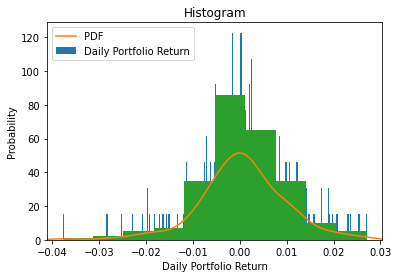

In [18]:
plt.hist(x, density=True, bins=250, label="Daily Portfolio Return")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel('Probability')
plt.xlabel('Daily Portfolio Return')
plt.title("Histogram")

plt.hist(x)

#### b. Using expected mean, covariance matrix and parametric method, calculate VaR95% and CVaR95%

The mean of investment return and standard deviation of return are both annual as our horizon is 1 year.

Assuming the distribution of portfolio return is normal disctribution.

In [19]:

# average return of portfolio
mean_port = portfolio_return.mean()

std = portfolio_ret.std()
cov_matrix = ret.cov()
cov_matrix # covariance matrix of returns

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Symbols,,,,,,,
AAPL,0.000218,0.000054,0.000088,0.000079,0.000049,0.000054,0.000090
IBM,0.000054,0.000155,0.000052,0.000099,0.000065,0.000023,0.000092
GOOG,0.000088,0.000052,0.000157,0.000047,0.000030,0.000049,0.000065
BP,0.000079,0.000099,0.000047,0.000353,0.000155,0.000026,0.000169
XOM,0.000049,0.000065,0.000030,0.000155,0.000148,0.000021,0.000086
COST,0.000054,0.000023,0.000049,0.000026,0.000021,0.000122,0.000047
GS,0.000090,0.000092,0.000065,0.000169,0.000086,0.000047,0.000285


In [20]:
# standard deviation of portfolio returns
weights = np.array(weights)
std_port = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
std_port

0.009072959293550373

In [21]:
alpha = 0.05
#inv = 10000000

from scipy.stats import norm

parametric_var = norm.ppf((1-0.05))*std_port-mean_port
print('Parametric VaR is', parametric_var)

Parametric VaR is 0.014344908906056168


In [22]:
parametric_cvar = alpha**(-1)*norm.pdf(norm.ppf(alpha))*std_port - mean_port

print('Parametric CVaR is', parametric_cvar)

Parametric CVaR is 0.01813612824167665


#### c. Assume you can change weights, allow shorting but no leverage (i.e. sum of weights equal 100%), and rebalance monthly. What is the optimal portfolio holding by end of each month till end of 2016. Notes: If you have other assumption(s) please state clearly

We apply Modern Portfolio Theory. Modern portfolio theory argues that an investment's risk and return characteristics should not be viewed alone, but should be evaluated by how the investment affects the overall portfolio's risk and return. MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk.

We use __sharp ratio__ as measurement of optimization of trade-off between return and risk. The sharp ratio is defined by monthly mean return of portfolio / standard deviation of monthly return of portfolio, as the period horizon is monthly according to the requirments of this question. Besides, portfolio optimization aiming to minimize Volatility, defined as standard deviation of return of portfolio, is present for comparison.

In [23]:
import yfinance as yf
from pandas_datareader import data as pdr
import datetime as dt


#ticker = ['AAPL.O','IBM.N','GOOG.O', 'BP.N','XOM.N','COST.O','GS.N']
ticker = ['AAPL','IBM','GOOG', 'BP','XOM','COST','GS']
weights = np.array([0.15, 0.2,0.2,0.15,0.1,0.15,0.05])

data = pdr.get_data_yahoo(ticker, start="2016-01-01", end="2016-12-31")['Close']
data

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2015-12-31,26.315001,137.619995,758.880005,31.260000,77.949997,161.500000,180.229996
2016-01-04,26.337500,135.949997,741.840027,31.059999,77.459999,159.539993,177.139999
2016-01-05,25.677500,135.850006,742.580017,30.930000,78.120003,159.929993,174.089996
2016-01-06,25.174999,135.169998,743.619995,30.299999,77.470001,158.449997,169.839996
2016-01-07,24.112499,132.860001,726.390015,29.430000,76.230003,154.820007,164.619995
...,...,...,...,...,...,...,...
2016-12-23,29.129999,166.710007,789.909973,37.020000,90.709999,162.080002,240.970001
2016-12-27,29.315001,167.139999,791.549988,37.110001,90.750000,162.050003,241.559998
2016-12-28,29.190001,166.190002,785.049988,37.250000,90.300003,161.009995,240.649994


In [24]:
# Let's only consider the return in 2016
data = data[1:]
data

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2016-01-04,26.337500,135.949997,741.840027,31.059999,77.459999,159.539993,177.139999
2016-01-05,25.677500,135.850006,742.580017,30.930000,78.120003,159.929993,174.089996
2016-01-06,25.174999,135.169998,743.619995,30.299999,77.470001,158.449997,169.839996
2016-01-07,24.112499,132.860001,726.390015,29.430000,76.230003,154.820007,164.619995
2016-01-08,24.240000,131.630005,714.469971,28.910000,74.690002,152.110001,163.940002
...,...,...,...,...,...,...,...
2016-12-23,29.129999,166.710007,789.909973,37.020000,90.709999,162.080002,240.970001
2016-12-27,29.315001,167.139999,791.549988,37.110001,90.750000,162.050003,241.559998
2016-12-28,29.190001,166.190002,785.049988,37.250000,90.300003,161.009995,240.649994


Daily return is calculated as daily percentage return

In [25]:
ret = data.pct_change().dropna()
ret # daily return for single stock

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2016-01-05,-0.025059,-0.000735,0.000998,-0.004185,0.008521,0.002445,-0.017218
2016-01-06,-0.019570,-0.005006,0.001400,-0.020369,-0.008321,-0.009254,-0.024413
2016-01-07,-0.042205,-0.017090,-0.023170,-0.028713,-0.016006,-0.022909,-0.030735
2016-01-08,0.005288,-0.009258,-0.016410,-0.017669,-0.020202,-0.017504,-0.004131
2016-01-11,0.016192,0.012155,0.002184,-0.002421,-0.013389,0.017159,0.010919
...,...,...,...,...,...,...,...
2016-12-23,0.001978,-0.002095,-0.001706,0.002980,-0.001761,0.000062,0.003540
2016-12-27,0.006351,0.002579,0.002076,0.002431,0.000441,-0.000185,0.002448
2016-12-28,-0.004264,-0.005684,-0.008212,0.003773,-0.004959,-0.006418,-0.003767


In [26]:
portfolio_ret = ret * weights
portfolio_ret['Portfolio Return'] = portfolio_ret.sum(axis=1)
portfolio_return = portfolio_ret['Portfolio Return']
portfolio_ret # portfolio return derived by given weights

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS,Portfolio Return
Date,,,,,,,,
2016-01-05,-0.003759,-0.000147,0.000200,-0.000628,0.000852,0.000367,-0.000861,-0.003976
2016-01-06,-0.002935,-0.001001,0.000280,-0.003055,-0.000832,-0.001388,-0.001221,-0.010153
2016-01-07,-0.006331,-0.003418,-0.004634,-0.004307,-0.001601,-0.003436,-0.001537,-0.025263
2016-01-08,0.000793,-0.001852,-0.003282,-0.002650,-0.002020,-0.002626,-0.000207,-0.011843
2016-01-11,0.002429,0.002431,0.000437,-0.000363,-0.001339,0.002574,0.000546,0.006714
...,...,...,...,...,...,...,...,...
2016-12-23,0.000297,-0.000419,-0.000341,0.000447,-0.000176,0.000009,0.000177,-0.000006
2016-12-27,0.000953,0.000516,0.000415,0.000365,0.000044,-0.000028,0.000122,0.002387
2016-12-28,-0.000640,-0.001137,-0.001642,0.000566,-0.000496,-0.000963,-0.000188,-0.004500


#### Historical Approach calculation on VaR and CVaR

The simplicity and convenience of the normal distribution are powerful inducements for its use in VAR analysis, but this does not necessarily make its use appropriate. 

If these returns are governed by the normal distribution, then 95 percent of all returns will fall within 1.96 standard deviations of the mean return. 

In [27]:
import matplotlib.pyplot as plt
import scipy.stats as st


x = portfolio_return
hist_var = np.percentile(x,0.05)

print('Historical approach VaR is', str(hist_var))

Historical approach VaR is -0.03660020242161979


In [28]:
below_var = portfolio_return <= hist_var
hist_cvar = portfolio_return[below_var].mean()
hist_cvar
print('Historical approach CVaR is', str(hist_cvar))

Historical approach CVaR is -0.03779986302079976


we construct a frequency distribution of the daily returns within this period. The resulting histogram is shown below, with a normal distribution superimposed for comparison. The returns exhibit the typical pattern found in many asset returns: "fat tails" and left-skewness.

(array([ 1.,  2.,  5.,  7., 35., 86., 65., 35., 10.,  5.]),
 array([-0.03779986, -0.03130954, -0.02481921, -0.01832888, -0.01183856,
        -0.00534823,  0.0011421 ,  0.00763242,  0.01412275,  0.02061307,
         0.0271034 ]),
 <BarContainer object of 10 artists>)

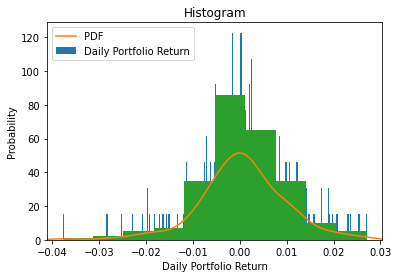

In [29]:
plt.hist(x, density=True, bins=250, label="Daily Portfolio Return")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel('Probability')
plt.xlabel('Daily Portfolio Return')
plt.title("Histogram")

plt.hist(x)

#### b. Using expected mean, covariance matrix and parametric method, calculate VaR95% and CVaR95%

The mean of investment return and standard deviation of return are both annual as our horizon is 1 year.

Assuming the distribution of portfolio return is normal disctribution.

In [30]:

# average return of portfolio
mean_port = portfolio_return.mean()

std = portfolio_ret.std()
cov_matrix = ret.cov()
cov_matrix # covariance matrix of returns

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Symbols,,,,,,,
AAPL,0.000218,0.000054,0.000088,0.000079,0.000049,0.000054,0.000090
IBM,0.000054,0.000155,0.000052,0.000099,0.000065,0.000023,0.000092
GOOG,0.000088,0.000052,0.000157,0.000047,0.000030,0.000049,0.000065
BP,0.000079,0.000099,0.000047,0.000353,0.000155,0.000026,0.000169
XOM,0.000049,0.000065,0.000030,0.000155,0.000148,0.000021,0.000086
COST,0.000054,0.000023,0.000049,0.000026,0.000021,0.000122,0.000047
GS,0.000090,0.000092,0.000065,0.000169,0.000086,0.000047,0.000285


In [31]:
# standard deviation of portfolio returns
weights = np.array(weights)
std_port = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
std_port

0.009072959293550373

In [32]:
alpha = 0.05
#inv = 10000000

from scipy.stats import norm

parametric_var = norm.ppf((1-0.05))*std_port-mean_port
print('Parametric VaR is', parametric_var)

Parametric VaR is 0.014344908906056168


In [33]:
parametric_cvar = alpha**(-1)*norm.pdf(norm.ppf(alpha))*std_port - mean_port

print('Parametric CVaR is', parametric_cvar)

Parametric CVaR is 0.01813612824167665


c. Assume you can change weights, allow shorting but no leverage (i.e. sum of weights equal 100%), and rebalance monthly. What is the optimal portfolio holding by end of each month till end of 2016. Notes: If you have other assumption(s) please state clearly

We apply Modern Portfolio Theory. Modern portfolio theory argues that an investment's risk and return characteristics should not be viewed alone, but should be evaluated by how the investment affects the overall portfolio's risk and return. MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk.

We use sharp ratio as measurement of optimization of trade-off between return and risk. The sharp ratio is defined by monthly mean return of portfolio / standard deviation of monthly return of portfolio, as the period horizon is monthly according to the requirments of this question.



In [34]:
import numpy as np
import scipy
from scipy.optimize import minimize

# We start by equal weights. r = return

In [35]:
ret

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2016-01-05,-0.025059,-0.000735,0.000998,-0.004185,0.008521,0.002445,-0.017218
2016-01-06,-0.019570,-0.005006,0.001400,-0.020369,-0.008321,-0.009254,-0.024413
2016-01-07,-0.042205,-0.017090,-0.023170,-0.028713,-0.016006,-0.022909,-0.030735
2016-01-08,0.005288,-0.009258,-0.016410,-0.017669,-0.020202,-0.017504,-0.004131
2016-01-11,0.016192,0.012155,0.002184,-0.002421,-0.013389,0.017159,0.010919
...,...,...,...,...,...,...,...
2016-12-23,0.001978,-0.002095,-0.001706,0.002980,-0.001761,0.000062,0.003540
2016-12-27,0.006351,0.002579,0.002076,0.002431,0.000441,-0.000185,0.002448
2016-12-28,-0.004264,-0.005684,-0.008212,0.003773,-0.004959,-0.006418,-0.003767


In [36]:
mon_ret = ret.resample('M').agg(lambda x: (x + 1).prod() - 1)
mon_ret

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2016-01-31,-0.076032,-0.082089,0.001496,0.042176,0.005035,-0.052777,-0.087953
2016-02-29,-0.006678,0.050004,-0.060812,-0.101328,0.029544,-0.007213,-0.074461
2016-03-31,0.127211,0.155842,0.067615,0.037470,0.042919,0.050323,0.049823
2016-04-30,-0.139921,-0.036382,-0.069723,0.112657,0.057543,-0.059970,0.045420
2016-05-31,0.065287,0.053447,0.061630,-0.064920,0.007014,0.004321,-0.028213
2016-06-30,-0.042660,-0.012749,-0.059289,0.130892,0.053022,0.055589,-0.068347
2016-07-31,0.090063,0.058242,0.110808,-0.031259,-0.051099,0.064824,0.068852
2016-08-31,0.018136,-0.010833,-0.002263,-0.015698,-0.020348,-0.030678,0.067061
2016-09-30,0.065504,-0.000189,0.013350,0.038393,0.001607,-0.059103,-0.048330


In [37]:
def eqw(r):
    n = r.shape[1]
    return np.ones(n)/n

In [38]:
# Combination of the two functions above - mean and variance of returns calculation
def port_mean_vol(w, r):
    w = np.array(w)
    port_mean = np.sum(r.mean() * w)
    cov = r.cov()
    port_vol = np.sqrt(np.dot(np.dot(cov,w),w))*np.sqrt(252)
    
    return port_mean, port_vol, cov

In [43]:
def opti_SR(r):
    n = r.shape[1]
    w = np.ones(n)/n
    def minimizeSharpeRatio(w,r):
        w = np.array(w)
        port_mean, port_vol, cov = port_mean_vol(w,r)
        sharp_ratio = port_mean/port_vol

        return (sharp_ratio*-1)

    def const(w):
        return np.sum(w)-1

    
    bounds = [[-1., 1.] for i in range(n)]
    constraints = ({'type':'eq','fun':const})
    
    #for i in range(r.shape[0]):
    optimized = scipy.optimize.minimize(minimizeSharpeRatio, w, (r), method='SLSQP', constraints=constraints, bounds=bounds)
        
    if not optimized.success:
        raise BaseException(optimized.message)
    #return op_w
    return optimized.x

In [44]:
def opti_Vol(r):
    n = r.shape[1]
    w = np.ones(n)/n
    
    def minimizeVol(w,r):
        w = np.array(w)
        port_mean, port_vol, cov = port_mean_vol(w,r)

        return port_vol
    
    def const(w):
        return np.sum(w)-1

    
    bounds = [(-1, 1.) for i in range(n)]
    constraints = ({'type':'eq','fun':const})
    
    optimized = scipy.optimize.minimize(minimizeVol,w, args = (r), method='SLSQP', constraints=constraints, bounds=bounds)
    if not optimized.success:
        raise BaseException(optimized.message)
    
    return optimized.x

In [45]:
'''
This is for testing


from numpy.random import default_rng
rng = default_rng()

df = pd.DataFrame()
for i in range(12):
    temp = pd.DataFrame(rng.standard_normal(7))
    df = df.append(temp.T)
    i+=1
df
opti_SR(df)
opti_Vol(df)

'''

'\nThis is for testing\n\n\nfrom numpy.random import default_rng\nrng = default_rng()\n\ndf = pd.DataFrame()\nfor i in range(12):\n    temp = pd.DataFrame(rng.standard_normal(7))\n    df = df.append(temp.T)\n    i+=1\ndf\nopti_SR(df)\nopti_Vol(df)\n\n'

In [46]:
opti_SR(ret)

array([ 0.04371154,  0.55456699, -0.159118  , -0.1455719 ,  0.2474727 ,
       -0.19733898,  0.65627765])

In [47]:
opti_Vol(ret)

array([ 0.04446533,  0.19828011,  0.16226629, -0.07109587,  0.31789771,
        0.35384104, -0.00565461])

In [48]:
temp = list(ret.resample('M'))
ret_m=[]
for i in temp:
    #for n in range(len(temp)):
    ret_m.append(i[1])

r0 = ret_m[0]
r3 = ret_m[3]
r2 = ret_m[2]

In [49]:
port_mean_vol(np.ones(7)/7, r0)

(-0.0018213197255471966,
 0.3023337202923308,
 Symbols      AAPL       IBM      GOOG        BP       XOM      COST        GS
 Symbols                                                                      
 AAPL     0.000798  0.000195  0.000404  0.000449  0.000371  0.000270  0.000492
 IBM      0.000195  0.000260  0.000183  0.000304  0.000267  0.000136  0.000215
 GOOG     0.000404  0.000183  0.000432  0.000441  0.000324  0.000261  0.000394
 BP       0.000449  0.000304  0.000441  0.000971  0.000652  0.000255  0.000512
 XOM      0.000371  0.000267  0.000324  0.000652  0.000627  0.000189  0.000371
 COST     0.000270  0.000136  0.000261  0.000255  0.000189  0.000221  0.000262
 GS       0.000492  0.000215  0.000394  0.000512  0.000371  0.000262  0.000568)

In [50]:
opti = [opti_SR, opti_Vol]
opti[0](ret_m[0])

array([-0.73665999, -1.        ,  1.        ,  1.        ,  0.78515898,
        0.95150102, -1.        ])

In [54]:
n_opti = len(opti)
n_period = len(ret_m)

In [55]:
opti_w = []
for i in range(0,n_period):
    for j in range(0,n_opti):
        opti_w.append(opti[j](ret_m[i]))
        
#opti_w # optimized weights by optimizing SR (even order) and minimizing Vol (odd order). 12 sets of weights in total

opti_w_sr = []
opti_w_vol=[]
for i in range(len(opti_w)):
    if i%2 != 0:
        opti_w_vol.append(opti_w[i])
    else:
        opti_w_sr.append(opti_w[i])

In [56]:
index = mon_ret.index
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov','Dec']
df_opti_w_sr = pd.DataFrame(opti_w_sr, index = index, columns = ticker)
df_opti_w_vol = pd.DataFrame(opti_w_vol, index = index, columns = ticker)

In [57]:
opti_port_sr = mon_ret.mul(df_opti_w_sr)
opti_port_vol = mon_ret.mul(df_opti_w_vol)

Text(0, 0.5, 'Cumulative Return')

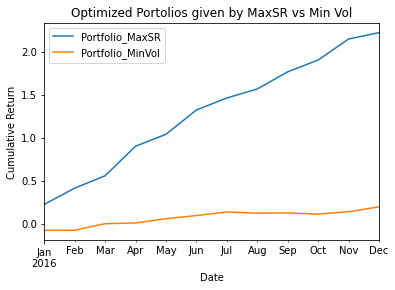

In [58]:
fig, ax = plt.subplots()

ln1 = opti_port_sr.sum(axis=1).cumsum()
ln2 = opti_port_vol.sum(axis=1).cumsum()
ln1.plot(label='Portfolio_MaxSR')
ln2.plot(label='Portfolio_MinVol')
#ax.legend([ln1, ln2], ['label1', 'label2'])
ax.set_title('Optimized Portolios given by MaxSR vs Min Vol')
ax.legend(loc='upper left')
ax.set_ylabel('Cumulative Return')

### 5 Assume you have a Python project, which source code is under a git repo folder “my-python-project”. Write a program/script to produce the following statistics of this folder
a. How many python files\
b. How many lines of code in total, how many lines of comment line (empty line doesn’t
count)\
c. How many functions is defined in total\
d. How many lines of changes from the current version against HEAD~3\
e. Total folder size (in MB) per each of the subfolder (down to 2 level depth)

In [59]:
import os,re


pathname = os.path.expanduser("~/Documents/test")

#for testing

total_file_count = 0 

total_code_lines = 0  

total_lines = 0 

total_comment_lines = 0

total_blank_lines = 0 

total_function_count = 0

def analyze_code(codefilesource):
  '''
  Recording number of lines of codes within a file .py, lines including blank lines and comment lines

  :param codefilesource:
  :return:[code_line,comment_line,function_count]
  '''
  total_line = 0
  code_line = 0
  comment_line = 0
  blank_line = 0
  function_count = 0
  with open(codefilesource,encoding='gb18030',errors='ignore') as f:
    lines = f.readlines()
    total_line = len(lines)
    line_index = 0
    
    while line_index < total_line:
      line = lines[line_index]
      
      if line.strip().startswith("def"):
        function_count += 1
    
      if line.strip().startswith("#"):
        comment_line += 1 
      elif re.match("\s*'''",line) is not None:
       
        comment_line += 1
        line_index += 1
        line = lines[line_index]
        while re.match(".*'''$",line) is None:
              
          comment_line += 1
          line_index += 1
          line = lines[line_index]
       
        comment_line += 1        
      
      elif line =='\n':
        blank_line += 1
      line_index += 1
    code_line = total_line-comment_line-blank_line
  print("Under%s:"%codefilesource)
  print("Total lines：",total_line)
  print("Comment lines:",comment_line)
  print("Code lines：",code_line)
  print("Number of functions",function_count)
  return [code_line,comment_line,function_count]

def showfilename(dirpath):
    
    files_list = os.listdir(dirpath)
    
    for filename in files_list:
       
        filenamepath = dirpath+'/'+filename
       
        if os.path.isfile(filenamepath):
           
            if filenamepath.endswith('.py'):
                global total_file_count
                total_file_count += 1
               
                line = analyze_code(filenamepath)
                global total_code_lines,total_comment_lines,total_function_count
                total_code_lines,total_comment_lines=total_code_lines+line[0],total_comment_lines+line[1]
                total_function_count += line[2]
        elif os.path.isdir(filenamepath):
       
            showfilename(filenamepath)
if __name__ == '__main__':
   showfilename(pathname)
   print("**********")
   print("Total number of files under current path:",total_file_count)
   print("Total lines of codes:",total_code_lines)
   print("Total lines of comments:",total_comment_lines)
   print("Total number of functions",total_function_count)


Under/Users/carriegeng/Documents/test/a.py:
Total lines： 25
Comment lines: 8
Code lines： 15
Number of functions 0
Under/Users/carriegeng/Documents/test/6_date.py:
Total lines： 38
Comment lines: 17
Code lines： 14
Number of functions 0
Under/Users/carriegeng/Documents/test/lala/a.py:
Total lines： 25
Comment lines: 8
Code lines： 15
Number of functions 0
Under/Users/carriegeng/Documents/test/lala/w11w/a.py:
Total lines： 25
Comment lines: 8
Code lines： 15
Number of functions 0
Under/Users/carriegeng/Documents/test/b.py:
Total lines： 56
Comment lines: 12
Code lines： 44
Number of functions 2
Under/Users/carriegeng/Documents/test/5_a&b.py:
Total lines： 88
Comment lines: 25
Code lines： 57
Number of functions 2
Under/Users/carriegeng/Documents/test/Untitled-1.py:
Total lines： 135
Comment lines: 77
Code lines： 56
Number of functions 2
**********
Total number of files under current path: 7
Total lines of codes: 216
Total lines of comments: 155
Total number of functions 6



### 6. In a text file, give me total number of appearance of “date” within the text file The date format can appears in either one (or multiple) formats shown below: \
a. YYYY/MM/DD\
b. MM/DD/YYYY\
c. DD/MM/YYYY\
d. DD (Jan/Feb/Mar/Apr/May/Jun/Jul/Aug/Sept/Oct/Nov/Dec) YYYY

In [60]:
import re

'''
txt for test:

2021/01/21
2021/01/21
2021/01/21
11/12/2020
11/30/2019
11/12/2020

11Jan2021
11Jan2021
11Jan2021
11Jan2021
'''

txt_file = open("test.txt")

with open('test.txt','r',encoding='utf-8') as f:
  content = f.read()

# rule1：YYYY/MM/DD
pattern1 = r"(\d{4}/\d{2}/\d{2})"
# rule2：MM/DD/YYYY, DD/MM/YYYY
pattern2 = r"(\d{2}/\d{2}/\d{4})"
# rule3：DD(Jan/Feb)YYYY 
pattern3 =  "(\d{2}(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sept|Oct|Nov|Dec)\d{4})"

print(re.findall(pattern1, content))
len1 = len(re.findall(pattern1, content))
print(re.findall(pattern2, content))
len2 = len(re.findall(pattern2, content))
print(re.findall(pattern3, content))
len3 = len(re.findall(pattern3, content))


print("The total number of appearance of “date” within the text file:",len1+len2+len3)

['2021/01/21', '2021/01/21', '2021/01/21']
['11/12/2020', '11/30/2019', '11/12/2020']
[('11Jan2021', 'Jan'), ('11Jan2021', 'Jan'), ('11Jan2021', 'Jan'), ('11Jan2021', 'Jan')]
The total number of appearance of “date” within the text file: 10


### PS

What interesting questions! I could have done better if given time. Thanks for your consideration. Looking forward to hearing from you soon.


Yiwei Geng